<a href="https://colab.research.google.com/github/pascal-maker/Python/blob/master/Labo_08_Niet_stationaire_tijdsreeksen_opgave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:darkorange"> Niet stationaire tijdsreeksen opgave


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
# %matplotlib inline
# plt.style.use('seaborn')
# sns.set_style("darkgrid")

## <span style="color:deeppink"> CO<sup>2</sup> uitstoot </span>

De dataset CO<sup>2 </sup> bevat historische gegevens van de wereldwijde CO<sup>2 </sup>  uitstoot, die mede verantwoordelijk zou zijn voor de opwarming van de aarde. De uitstoot wordt gegeven in Gigaton (miljard ton = duizend miljard kilogram).

Laad het bestand `CO2.csv` in als de dataset, gebruik de kolom jaar als de index kolom

In [77]:
dataset = pd.read_csv('/content/CO2.csv', index_col='Jaar')
dataset.head()

,Uitstoot CO2 (Gigaton)
Jaar,
1975,15.54
1976,16.37
1977,16.93
1978,17.44
1979,17.96


Maak een grafiek van deze tijdreeks

Text(0, 0.5, 'Uitstoot CO2 (Gigaton)')

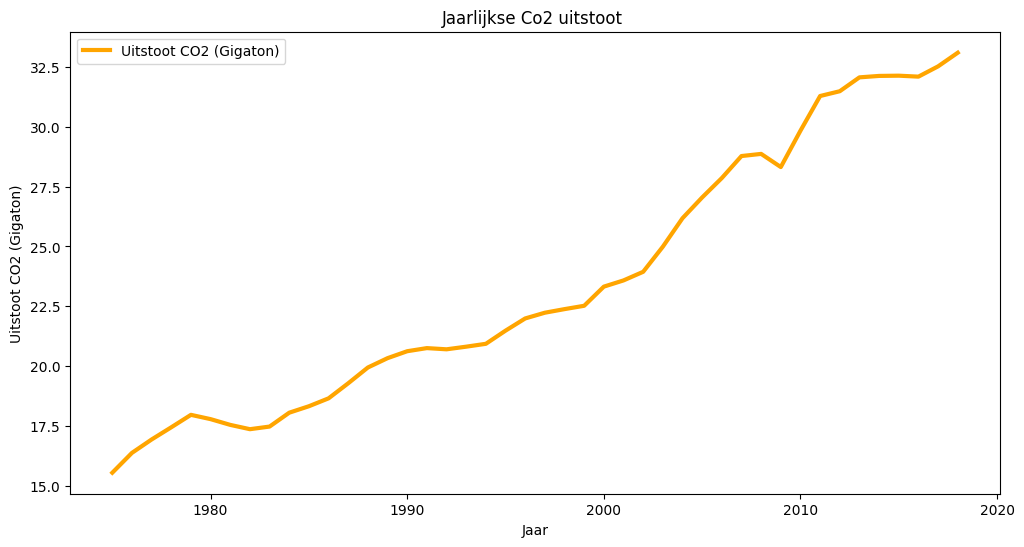

In [78]:
dataset.plot(color='orange',linewidth=3,figsize=(12,6))
plt.title('Jaarlijkse Co2 uitstoot ')
plt.xlabel("Jaar")
plt.ylabel("Uitstoot CO2 (Gigaton)")

Ga na of er een lineaire trend aanwezig is en of deze dat al dan niet stationair is.

In [79]:
from sklearn import datasets,linear_model
x = dataset.index.values
y = dataset['Uitstoot CO2 (Gigaton)'].values
regressionline = linear_model.LinearRegression()
regressionline.fit(x.reshape(-1,1),y)
print('Intercept=',regressionline.intercept_)
print('Richtingscoëfficiënt=',regressionline.coef_[0])

Intercept= -809.6158985200843
Richtingscoëfficiënt= 0.4172762508809019


<Axes: xlabel='Jaar'>

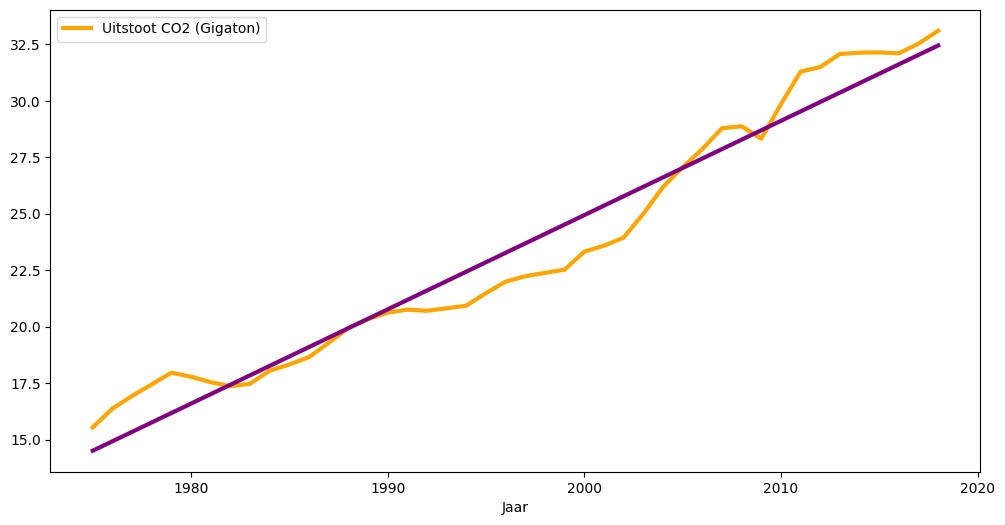

In [80]:
dataset.plot(color='orange',linewidth=3,figsize=(12,6))
sns.lineplot(x=x,y=regressionline.predict(x.reshape(-1,1)),color='purple',linewidth=3)

Verwijder de trend uit de data zodat je de residuen bekomt.

In [81]:
dataset['trendlijn'] = dataset.index*regressionline.coef_[0] + regressionline.intercept_
dataset.head()

,Uitstoot CO2 (Gigaton),trendlijn
Jaar,,
1975,15.54,14.504697
1976,16.37,14.921973
1977,16.93,15.339249
1978,17.44,15.756526
1979,17.96,16.173802


In [82]:
dataset['residuen'] =dataset['Uitstoot CO2 (Gigaton)'] - dataset['trendlijn']
dataset.head()

,Uitstoot CO2 (Gigaton),trendlijn,residuen
Jaar,,,
1975,15.54,14.504697,1.035303
1976,16.37,14.921973,1.448027
1977,16.93,15.339249,1.590751
1978,17.44,15.756526,1.683474
1979,17.96,16.173802,1.786198


Maak een plot van de residuen en controleer of de residuen stationair zijn via het toevoegen van een trendlijn

<Figure size 1200x600 with 0 Axes>

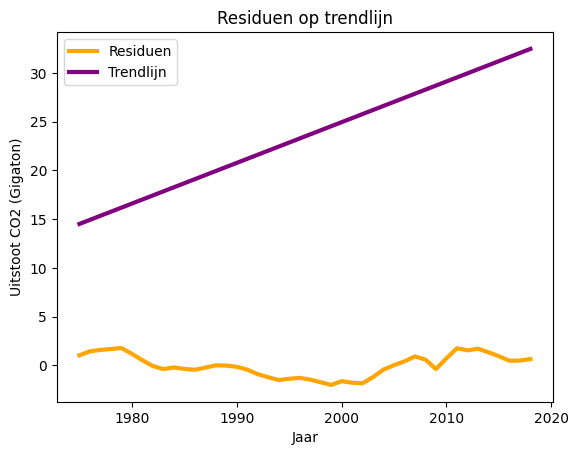

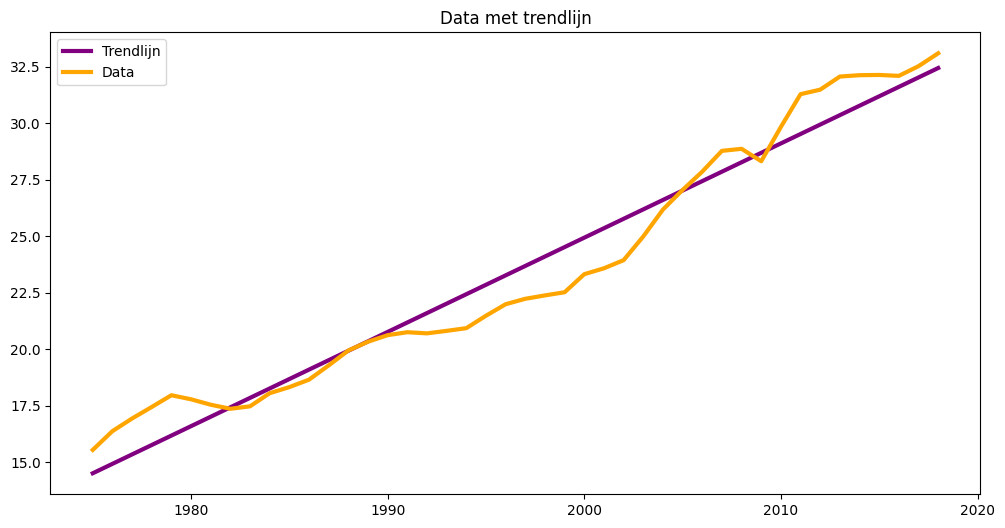

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
dataset[['residuen', 'trendlijn']].plot(color=['orange', 'purple'], linewidth=3)
plt.legend(labels=['Residuen', 'Trendlijn'])
plt.title("Residuen op trendlijn")
plt.xlabel(dataset.index.name)
plt.ylabel(dataset.columns[0])
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x=x, y=regressionline.predict(x.reshape(-1, 1)), color='purple', linewidth=3, label='Trendlijn')
plt.plot(x, dataset.iloc[:, 0], color='orange', linewidth=3, label='Data')
plt.legend()
plt.title("Data met trendlijn")
plt.show()


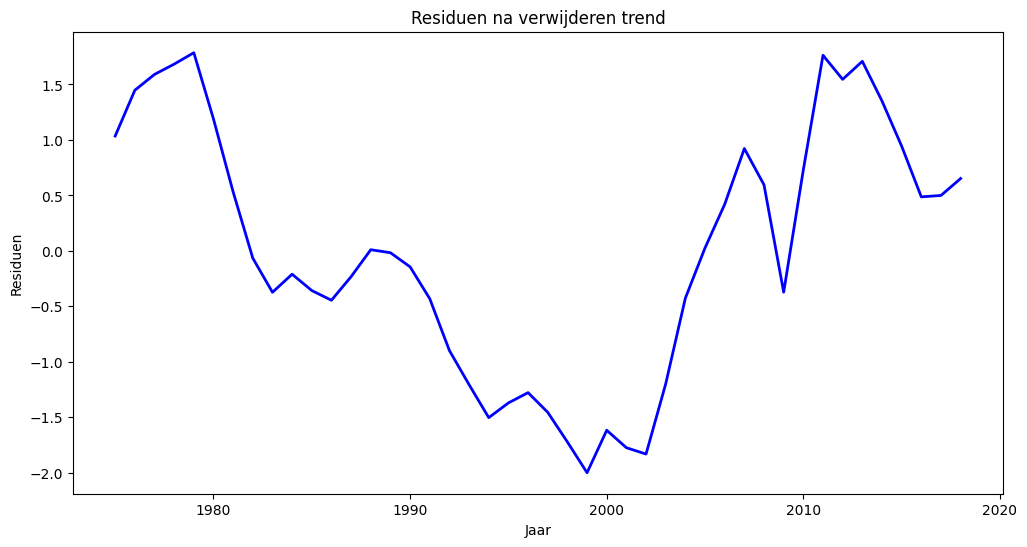

In [84]:
# 6. Maak een plot van de residuen
dataset['residuen'].plot(color='blue', linewidth=2, figsize=(12,6))
plt.title('Residuen na verwijderen trend')
plt.xlabel('Jaar')
plt.ylabel('Residuen')
plt.show()

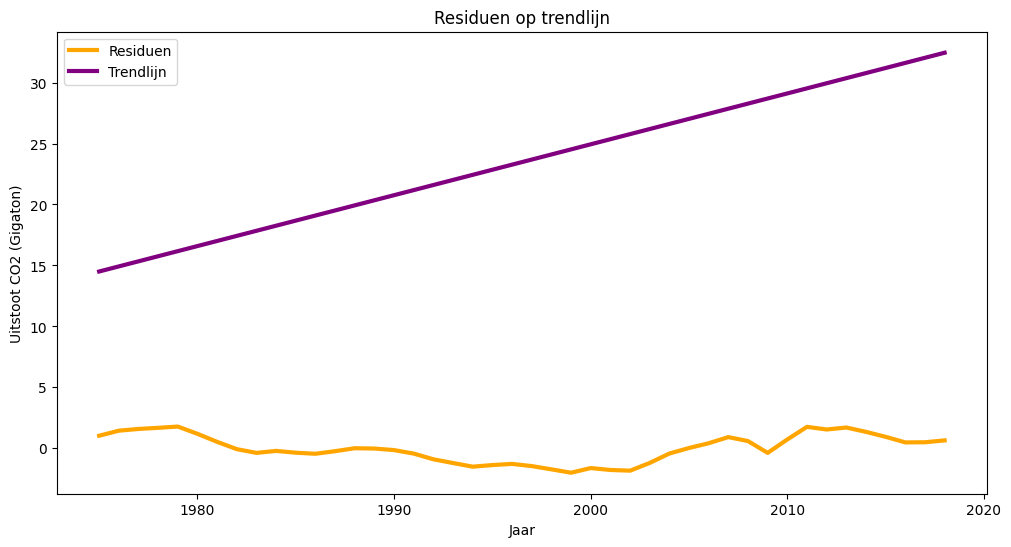

<Figure size 1200x600 with 0 Axes>

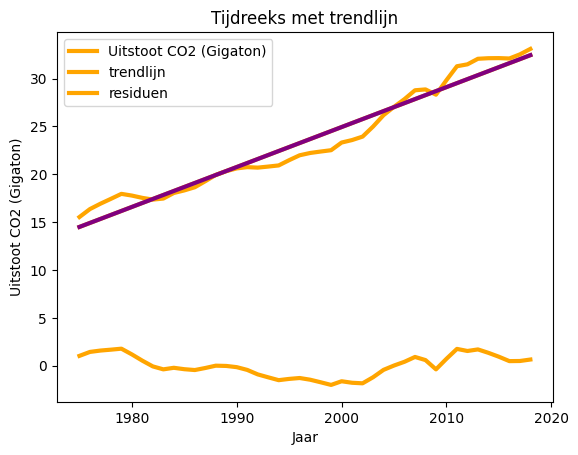

In [85]:
def plot_residuen_trend(df, resid_col, trend_col, x, prediction, title):
    plt.figure(figsize=(12, 6))
    df[resid_col].plot(color='orange', linewidth=3, label='Residuen')
    df[trend_col].plot(color='purple', linewidth=3, label='Trendlijn')
    plt.legend()
    plt.title(title)
    plt.xlabel(df.index.name)
    plt.ylabel(df.columns[0])
    plt.show()

    # Plot van de originele tijdreeks met trendlijn
    plt.figure(figsize=(12, 6))
    df.plot(color='orange', linewidth=3)
    sns.lineplot(x=x, y=prediction, color='purple', linewidth=3)
    plt.title("Tijdreeks met trendlijn")
    plt.xlabel(df.index.name)
    plt.ylabel(df.columns[0])
    plt.show()

# Aanroepen van de functie
plot_residuen_trend(dataset, 'residuen', 'trendlijn', x, regressionline.predict(x.reshape(-1,1)), "Residuen op trendlijn")


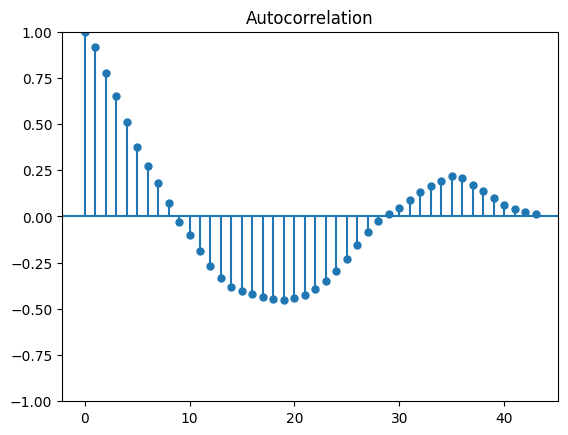

In [86]:
fig = plot_acf(dataset['residuen'],lags=len(dataset) -1,alpha=None)

Gebruik moving average en exponentiële demping om het residu van 2019 te voorspellen. Voorspel ook eenvoudigweg op basis van de trendlijn. Zoek de optimale alpha wanneer je gebruik maakt van exponentiele demping. Kies de beste voorspellingsmethode op basis van de MAE (Mean Average Error).

 The lowest MAE is: 0.34353090122425756 index:
alpha 1.0


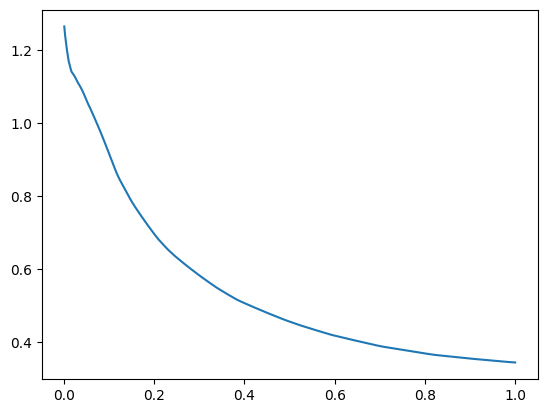

In [87]:
step = 1e-3
alphas = np.arange(start=0,stop=1+step,step = step)
df = pd.DataFrame()
mae = []
for alpha in alphas[1:]:
  exponential = []
  exponential = dataset['residuen'].ewm(alpha=alpha,adjust=False).mean().shift(1)
  mae.append(abs(dataset['residuen'] - exponential).mean())
df['mae']   = mae
df.set_index(alphas[1:],inplace=True)
df.index.name = 'Alpha'
minimum_mae = df['mae'].min()
print(" The lowest MAE is:",minimum_mae,"index:")
print("alpha",df[df['mae'] == minimum_mae].index[0])
plt.plot(df['mae'])



In [88]:
dataset['exponentiele demping'] = dataset['residuen'].ewm(alpha=0.813,adjust=False).mean().shift(1)
dataset.head()

,Uitstoot CO2 (Gigaton),trendlijn,residuen,exponentiele demping
Jaar,,,,
1975,15.54,14.504697,1.035303,NaN
1976,16.37,14.921973,1.448027,1.035303
1977,16.93,15.339249,1.590751,1.370847
1978,17.44,15.756526,1.683474,1.549629
1979,17.96,16.173802,1.786198,1.658445


In [89]:
dataset['absolute fout exponentiele demping'] = abs(dataset['residuen'] - dataset['exponentiele demping'])
dataset.head()

,Uitstoot CO2 (Gigaton),trendlijn,residuen,exponentiele demping,absolute fout exponentiele demping
Jaar,,,,,
1975,15.54,14.504697,1.035303,NaN,NaN
1976,16.37,14.921973,1.448027,1.035303,0.412724
1977,16.93,15.339249,1.590751,1.370847,0.219903
1978,17.44,15.756526,1.683474,1.549629,0.133846
1979,17.96,16.173802,1.786198,1.658445,0.127753


In [90]:
print("De mean abosolute error is:",round(dataset['absolute fout exponentiele demping'].mean(),2))

De mean abosolute error is: 0.37


Voeg de trend opnieuw toe aan de beste voorspelling

In [91]:
dataset['voorspelling exponentiele demping'] = dataset['trendlijn'] + dataset['exponentiele demping']
dataset.head()

,Uitstoot CO2 (Gigaton),trendlijn,residuen,exponentiele demping,absolute fout exponentiele demping,voorspelling exponentiele demping
Jaar,,,,,,
1975,15.54,14.504697,1.035303,NaN,NaN,NaN
1976,16.37,14.921973,1.448027,1.035303,0.412724,15.957276
1977,16.93,15.339249,1.590751,1.370847,0.219903,16.710097
1978,17.44,15.756526,1.683474,1.549629,0.133846,17.306154
1979,17.96,16.173802,1.786198,1.658445,0.127753,17.832247


Maak een grafiek van de tijdreeks samen met de voorspellingslijn.

Text(0, 0.5, 'Uitstoot CO2 (Gigaton)')

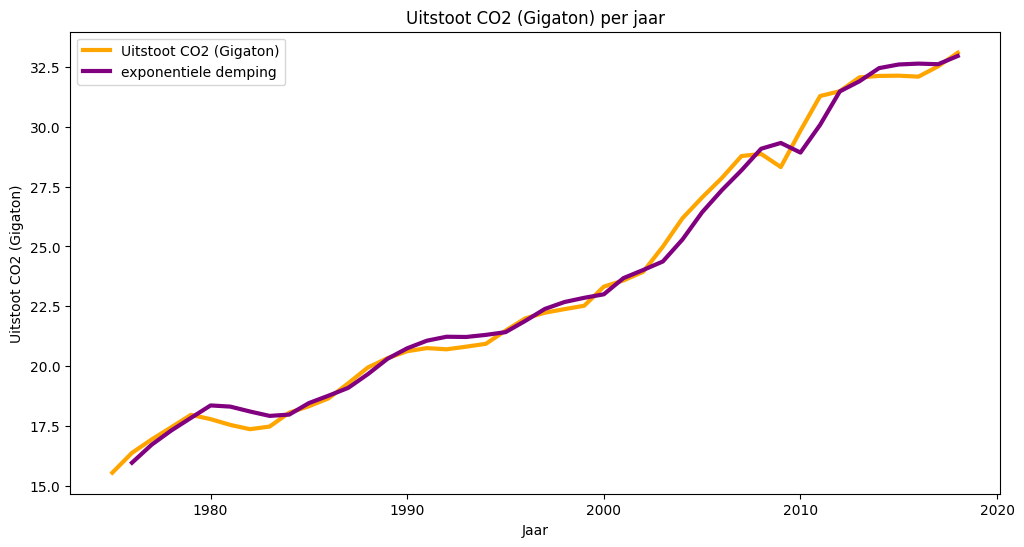

In [92]:
dataset['Uitstoot CO2 (Gigaton)'].plot(color='orange',linewidth=3, figsize=(12,6))
dataset['voorspelling exponentiele demping'].plot(color='purple',linewidth=3)
plt.legend(labels=['Uitstoot CO2 (Gigaton)','exponentiele demping'])
plt.title("Uitstoot CO2 (Gigaton) per jaar")
plt.xlabel(dataset.index.name)
plt.ylabel(dataset.columns[0])


In [93]:
# 1. Trendlijnwaarde voor 2019
trend_2019 = regressionline.predict(np.array([[2019]]))[0]

# 2. Laatste voorspelde residu
laatste_residuprog = dataset['exponentiele demping'].iloc[-1]

# 3. Voorspelling uitstoot 2019
voorspelling_2019 = trend_2019 + laatste_residuprog
print(f"De voorspelling voor 2019 is ongeveer {voorspelling_2019:.2f} gigaton CO2.")


De voorspelling voor 2019 is ongeveer 33.38 gigaton CO2.


## <span style="color:deeppink"> alcohol sales </span>
De winst op verkoop van alcohol stijgt jaar na jaar. In het tabblad alcohol sales kan je de verkoop per maand zien sinds 1992 in miljoen dollar. (bron: https://fred.stlouisfed.org/series/S4248SM144NCEN#0)

Lees het bestand `alcohol sales.csv` in, gebruik de eerste kolom als index



In [97]:
dataset = pd.read_csv('/content/alcohol sales.csv', index_col=0)
dataset.head()

,date,Month,sales (million dollar)
id,,,
0,1/01/1992,January,3459
1,1/02/1992,February,3458
2,1/03/1992,March,4002
3,1/04/1992,April,4564
4,1/05/1992,May,4221


Maak een grafiek van deze tijdreeks

Text(0, 0.5, 'sales(million dollar)')

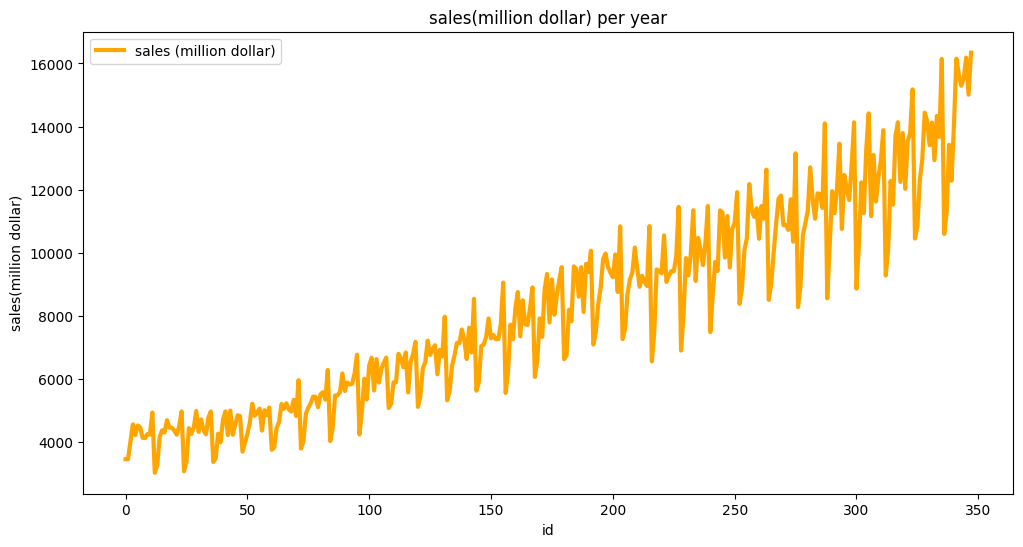

In [98]:
dataset.plot(color='orange',linewidth=3,figsize=(12,6))
plt.title('sales(million dollar) per year')
plt.xlabel("id")
plt.ylabel("sales(million dollar)")

In [99]:
from sklearn import datasets,linear_model
x = dataset.index.values
y = dataset['sales (million dollar)'].values
regressionline = linear_model.LinearRegression()
regressionline.fit(x.reshape(-1,1),y)
print('Intercept=',regressionline.intercept_)
print('Richtingscoëfficiënt=',regressionline.coef_[0])

Intercept= 3089.042502387776
Richtingscoëfficiënt= 29.733465983786378


<Axes: xlabel='id'>

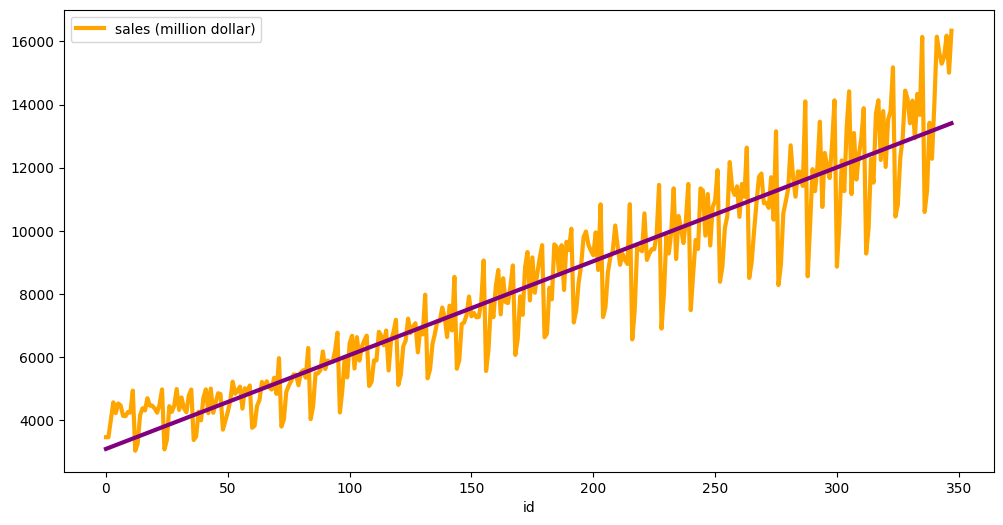

In [100]:
dataset.plot(color='orange',linewidth=3,figsize=(12,6))
sns.lineplot(x=x,y=regressionline.predict(x.reshape(-1,1)),color='purple',linewidth=3)

In [101]:
dataset['trendlijn'] = dataset.index*regressionline.coef_[0] + regressionline.intercept_
dataset.head()

,date,Month,sales (million dollar),trendlijn
id,,,,
0,1/01/1992,January,3459,3089.042502
1,1/02/1992,February,3458,3118.775968
2,1/03/1992,March,4002,3148.509434
3,1/04/1992,April,4564,3178.242900
4,1/05/1992,May,4221,3207.976366


In [102]:
dataset['residuen'] =dataset['sales (million dollar)'] - dataset['trendlijn']
dataset.head()

,date,Month,sales (million dollar),trendlijn,residuen
id,,,,,
0,1/01/1992,January,3459,3089.042502,369.957498
1,1/02/1992,February,3458,3118.775968,339.224032
2,1/03/1992,March,4002,3148.509434,853.490566
3,1/04/1992,April,4564,3178.242900,1385.757100
4,1/05/1992,May,4221,3207.976366,1013.023634


<Axes: xlabel='id'>

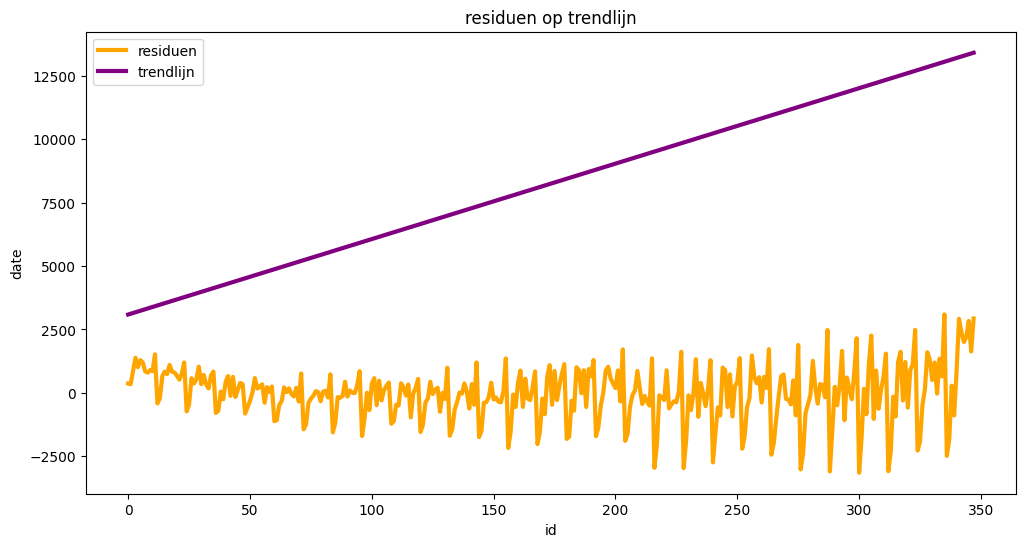

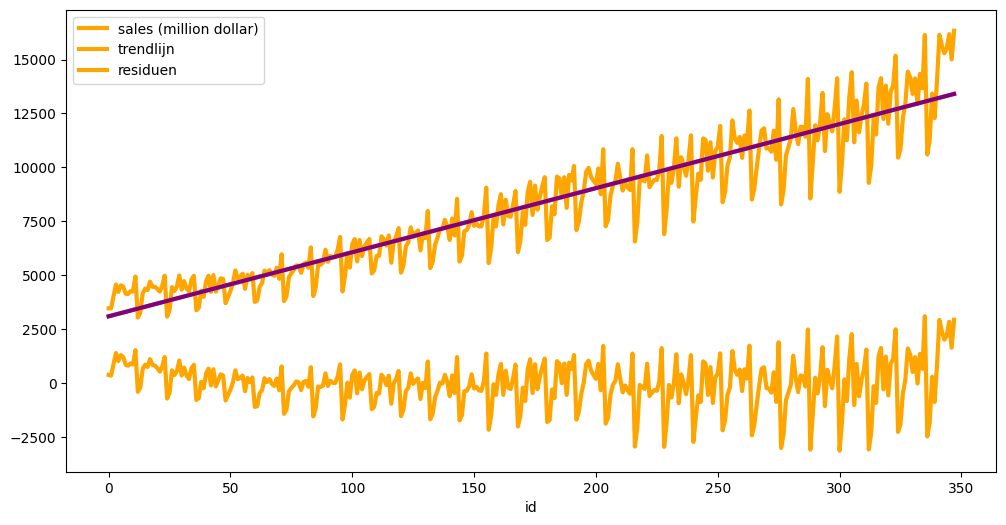

In [103]:
dataset['residuen'].plot(color='orange',linewidth=3, figsize=(12,6))
dataset['trendlijn'].plot(color='purple',linewidth=3)
plt.legend(labels=['residuen','trendlijn'])
plt.title("residuen op trendlijn")
plt.xlabel(dataset.index.name)
plt.ylabel(dataset.columns[0])
dataset.plot(color='orange',linewidth=3,figsize=(12,6))
sns.lineplot(x=x,y=regressionline.predict(x.reshape(-1,1)),color='purple',linewidth=3)

Bepaal de trend in de tijdreeks en geef de vergelijking ervan.

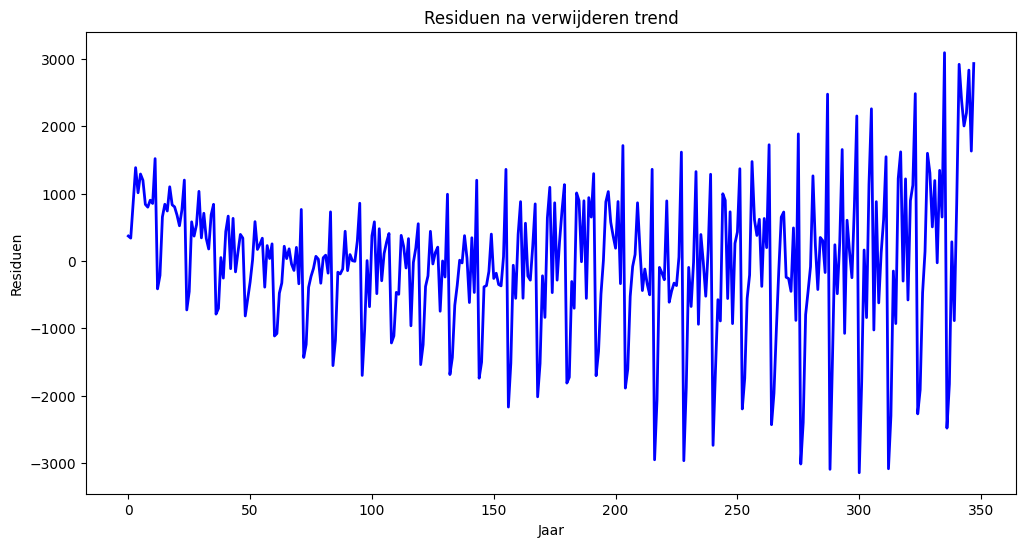

In [104]:
# 6. Maak een plot van de residuen
dataset['residuen'].plot(color='blue', linewidth=2, figsize=(12,6))
plt.title('Residuen na verwijderen trend')
plt.xlabel('Jaar')
plt.ylabel('Residuen')
plt.show()

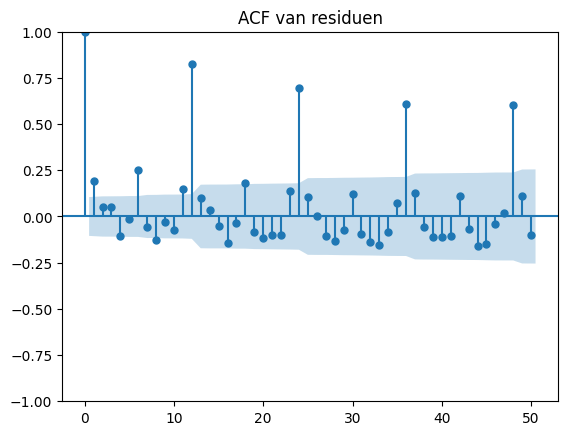

In [105]:
# 6. ACF plot van de residuen
plot_acf(dataset['residuen'], lags=50)
plt.title('ACF van residuen')
plt.show()

Gebruik seizoensregressie om een voorspelling van de sales van elke maand in 2021 te doen.
1.	Verwijder eerst de trend.
2.	Bepaal het gemiddelde van de residuen van elke maand.
3.	Voorspel het aantal verkopen van elke maand aan de hand van seizoensregressie.
4.	Wat is de MAE?


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 348 entries, 0 to 347
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    348 non-null    object 
 1   Month                   348 non-null    object 
 2   sales (million dollar)  348 non-null    int64  
 3   trendlijn               348 non-null    float64
 4   residuen                348 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 16.3+ KB


In [ ]:
print(dataset.dtypes)
print(dataset['Month'].head())


date                       object
Month                      object
sales (million dollar)      int64
trendlijn                 float64
residuen                  float64
dtype: object
id
0     January
1    February
2       March
3       April
4         May
Name: Month, dtype: object


In [ ]:
df = dataset.groupby(['Month']).mean(numeric_only=True)
print(df)


           sales (million dollar)    trendlijn     residuen
Month                                                      
April                 7890.000000  8173.465186  -283.465186
August                8729.379310  8292.399050   436.980261
December              9788.827586  8411.332913  1377.494673
February              6730.241379  8113.998254 -1383.756874
January               6209.827586  8084.264788 -1874.437201
July                  8285.965517  8262.665584    23.299934
June                  9135.655172  8232.932118   902.723055
March                 7944.724138  8143.731720  -199.007582
May                   8727.103448  8203.198652   523.904797
November              8648.206897  8381.599448   266.607449
October               8680.275862  8351.865982   328.409881
September             8203.379310  8322.132516  -118.753205


In [ ]:
seizoensregressie = []
for i in range(len(dataset)):
    seizoensregressie.append(dataset.loc[i,'trendlijn'] + df.loc[dataset.loc[i,'Month'],'residuen'])

dataset['seizoensregressie'] = seizoensregressie
dataset.head()

,date,Month,sales (million dollar),trendlijn,residuen,seizoensregressie
id,,,,,,
0,1/01/1992,January,3459,3089.042502,369.957498,1214.605301
1,1/02/1992,February,3458,3118.775968,339.224032,1735.019094
2,1/03/1992,March,4002,3148.509434,853.490566,2949.501853
3,1/04/1992,April,4564,3178.242900,1385.757100,2894.777715
4,1/05/1992,May,4221,3207.976366,1013.023634,3731.881163


In [ ]:
dataset['absolute fout seizoensregressie'] = abs(dataset['sales (million dollar)'] - dataset['seizoensregressie'])
dataset.head()

,date,Month,sales (million dollar),trendlijn,residuen,seizoensregressie,absolute fout seizoensregressie
id,,,,,,,
0,1/01/1992,January,3459,3089.042502,369.957498,1214.605301,2244.394699
1,1/02/1992,February,3458,3118.775968,339.224032,1735.019094,1722.980906
2,1/03/1992,March,4002,3148.509434,853.490566,2949.501853,1052.498147
3,1/04/1992,April,4564,3178.242900,1385.757100,2894.777715,1669.222285
4,1/05/1992,May,4221,3207.976366,1013.023634,3731.881163,489.118837


In [ ]:
print(" De mean absolute error is:",round(dataset['absolute fout seizoensregressie'].mean(),2))

 De mean absolute error is: 463.21


Text(0, 0.5, 'date')

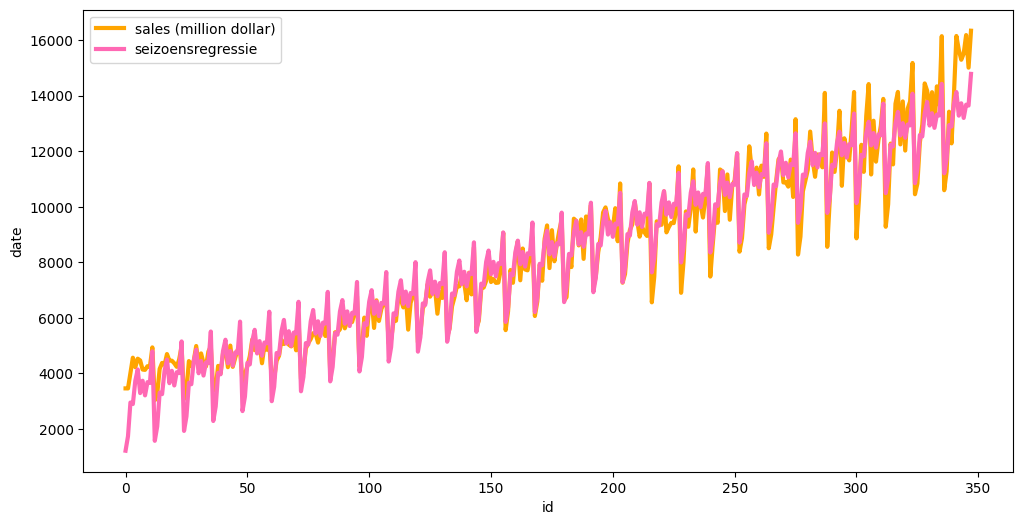

In [ ]:
dataset['sales (million dollar)'].plot(color='orange',linewidth=3,figsize=(12,6))
dataset['seizoensregressie'].plot(color='hotpink',linewidth=3)
plt.legend(labels = ['sales (million dollar)','seizoensregressie'])
plt.xlabel(dataset.index.name)
plt.ylabel(dataset.columns[0])

## <span style="color:deeppink"> toerisme </span>
Deze dataset bevat het  het aantal overnachtingen (in hotel, gastenkamers, campings,…) in Vlaanderen tijdens een bepaalde maand van een bepaald jaar. Gedetailleerde info per provincie kan je trouwens vinden op https://www.toerismevlaanderen.be  
Laad de dataset `toerisme.csv` in, gebruik de eerste kolom Datum als index

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from sklearn import linear_model

# Dataset laden
dataset = pd.read_csv('/content/toerisme.csv', index_col='Datum')

# Kolomnamen opschonen (spaties verwijderen)
dataset.columns = dataset.columns.str.strip()

# Maanden NL -> EN vervangen
maanden = {
    'januari': 'January', 'februari': 'February', 'maart': 'March', 'april': 'April',
    'mei': 'May', 'juni': 'June', 'juli': 'July', 'augustus': 'August',
    'september': 'September', 'oktober': 'October', 'november': 'November', 'december': 'December'
}

# Index (datum) omzetten
dataset.index = dataset.index.to_series().replace(maanden, regex=True)
dataset.index = pd.to_datetime(dataset.index, format='%B %Y')

# Controle
print(dataset.head())


            Jaar     Maand  Aantal maanden na januari 2014  \
Datum                                                        
2014-01-01  2014   januari                               0   
2014-02-01  2014  februari                               1   
2014-03-01  2014     maart                               2   
2014-04-01  2014     april                               3   
2014-05-01  2014       mei                               4   

            Aantal overnachtingen  
Datum                              
2014-01-01                1162818  
2014-02-01                1450616  
2014-03-01                1876276  
2014-04-01                2358104  
2014-05-01                2360854  


Deze code zorgt ervoor dat de **datumindex** van je **toerisme.csv** dataset correct wordt omgezet van een **Nederlandstalige** tekstuele maandnaam naar een **Python‑compatibele** datum‑/tijdstructuur. Hier is een stap‑voor‑stap uitleg:

---

### **1. Vervangen van Nederlandse maandnamen (NL → EN)**

```python
maanden = {
    'januari': 'January', 'februari': 'February', 'maart': 'March', 'april': 'April',
    'mei': 'May', 'juni': 'June', 'juli': 'July', 'augustus': 'August',
    'september': 'September', 'oktober': 'October', 'november': 'November', 'december': 'December'
}

dataset.index = dataset.index.to_series().replace(maanden, regex=True)
```

📝 **Wat dit doet:**

* Het maakt een **dictionary** (`maanden`) die elke Nederlandstalige maandnaam omzet naar de Engelse tegenhanger.
* Het `.replace()` commando vervangt alle **strings** in de index van de DataFrame (`dataset.index`) op basis van deze dictionary.
* **regex=True** zorgt ervoor dat de gehele string (niet alleen exacte matches) wordt vervangen, zodat bijvoorbeeld `"januari 2010"` wordt omgezet naar `"January 2010"`.

---

### **2. Omzetten naar `DatetimeIndex`**

```python
dataset.index = pd.to_datetime(dataset.index, format='%B %Y')
```

📝 **Wat dit doet:**

* **Format** specificeert dat de datumindex bestaat uit **maandnaam** (`%B`) gevolgd door een **jaar** (`%Y`).
* **Resultaat:** De index wordt nu een **`DatetimeIndex`**, waardoor je toegang krijgt tot krachtige tijdreeksenmethodes zoals `.resample()`, `.shift()`, `.rolling()`, en `.month`.

---

### **3. Controle van de dataset**

```python
print(dataset.head())
```

📝 **Wat dit doet:**

* Print de eerste 5 rijen van de dataset, zodat je kunt controleren of de index correct is omgezet naar een datetime‑formaat.
* Je verwacht nu zoiets als:

```plaintext
            Aantal overnachtingen
2010-01-01                  12345
2010-02-01                  14567
2010-03-01                  13456
2010-04-01                  15678
2010-05-01                  16789
```

---

### **Waarom is dit belangrijk?**

* **Voordelen van `DatetimeIndex`:**

  * Makkelijk aggregeren (`.resample()` voor jaar/kwartaal/mnd).
  * Seizoenseffecten herkennen (`.month`, `.quarter`).
  * Tijdsgebaseerde selecties (`loc['2010']`, `loc['2010-05']`).
* **Foutpreventie:** Voorkomt fouten bij berekeningen omdat Python standaard Engelse maandnamen verwacht.

---

### **🛠️ Voorbeeld vóór en na:**

**Voor de omzetting:**

```plaintext
Index(['januari 2010', 'februari 2010', 'maart 2010', ...], dtype='object')
```

**Na de omzetting:**

```plaintext
DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', ...], dtype='datetime64[ns]', freq=None)
```

---

Wil je dat ik dit verder optimaliseer of misschien aanpas zodat je dit in één enkele stap kunt doen? 😊


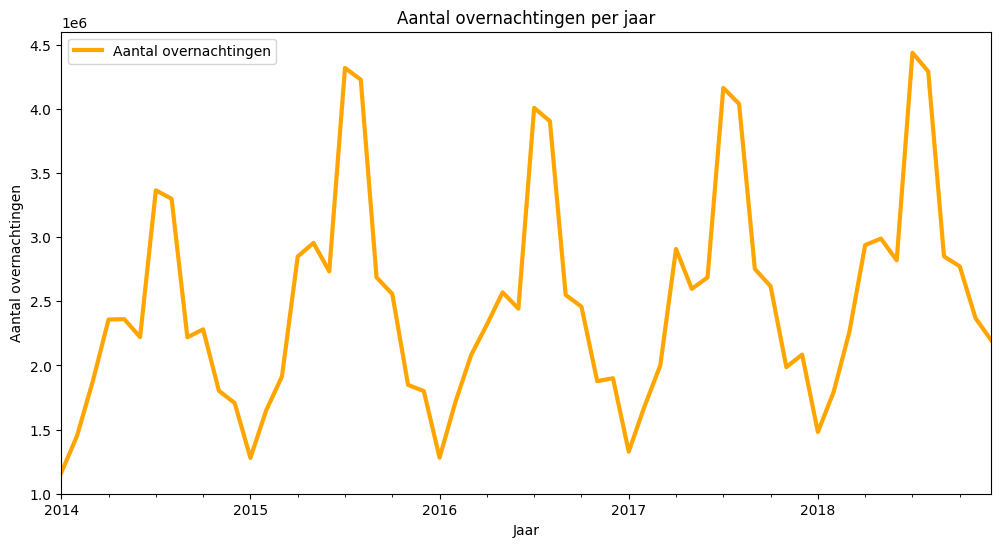

In [ ]:

# 3. Plot aantal overnachtingen
dataset.plot(y='Aantal overnachtingen', color='orange', linewidth=3, figsize=(12,6))
plt.title('Aantal overnachtingen per jaar')
plt.xlabel("Jaar")
plt.ylabel("Aantal overnachtingen")
plt.show()


Plot de grafiek van het aantal overnachtingen, bepaal de trend in de tijdsreeks & geef de vergelijking ervan.

Zoek een optimale techniek voor het voorspellen van de volgende sample. Je kan kiezen uit alle technieken die tot nu toe aan bod zijn gekomen:
- Volgende sample is huidige sample
- Moving average met verschillende groottes
- Exponentiële demping. Zorg dat je de optimale alfa kan vinden.
- Seizoensregressie

Welke techniek werkt het best bij deze dataset?  
Plot de echte waarde en de waarden van de voorspellingstechniek op dezelfde grafiek

In [ ]:
# 4. Lineaire regressie (trendlijn bepalen)
x = np.array([d.toordinal() for d in dataset.index])
y = dataset['Aantal overnachtingen'].values

regressionline = linear_model.LinearRegression()
regressionline.fit(x.reshape(-1,1), y)

print('Intercept =', regressionline.intercept_)
print('Richtingscoëfficiënt =', regressionline.coef_[0])


Intercept = -287736996.3469351
Richtingscoëfficiënt = 394.27553358288066


🔎 Wat doet toordinal()?
De functie toordinal() is een methode van Python's datetime.date klasse. Het converteert een datum naar een geheel getal, dat het aantal dagen sinds 1 januari van het jaar 1 (de "begin van de Gregoriaanse kalender") vertegenwoordigt.

🗓️ Voorbeeldgebruik:
python
Copy
Edit
import datetime

# Vandaag
vandaag = datetime.date(2025, 5, 7)
print(vandaag.toordinal())  # Geeft bijvoorbeeld 738362

# 1 januari 1
begin = datetime.date(1, 1, 1)
print(begin.toordinal())  # Altijd 1
⚙️ Toepassing in je code:
python
Copy
Edit
# Converteer de datetime index naar ordinals
x = np.array([d.toordinal() for d in dataset.index])
📝 Wat dit doet:

Neemt de DatetimeIndex van je toerisme dataset.

Zet elke datum om naar een geheel getal dat de absolute positie in de tijd aangeeft.

Dit maakt de data bruikbaar voor een lineaire regressie, omdat een LinearRegression model enkel numerieke input accepteert.

📊 Waarom toordinal() gebruiken?
Consistentie in tijdsafstanden:

Elke dag is precies 1 eenheid.

Vermijdt problemen met ongelijke maand- of jaarlengtes.

Stabielere modellen:

Werkt beter dan timestamp (te grote getallen) of datetime (niet numeriek).

In [ ]:

# 5. Trendlijn toevoegen aan dataset
dataset['trendlijn'] = regressionline.predict(x.reshape(-1,1))


<ipython-input-18-860129fe42a9>:3: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(dataset.index, dataset['trendlijn'], color='purple', linewidth=3)


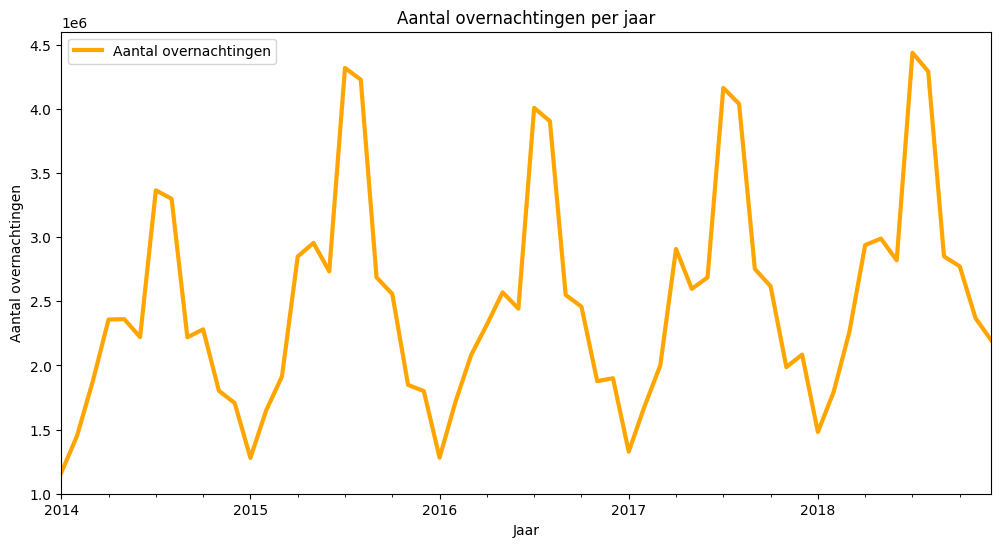

In [ ]:


# 6. Plot met trendlijn
dataset.plot(y='Aantal overnachtingen', color='orange', linewidth=3, figsize=(12,6))
plt.plot(dataset.index, dataset['trendlijn'], color='purple', linewidth=3)
plt.title('Aantal overnachtingen per jaar')
plt.xlabel("Jaar")
plt.ylabel("Aantal overnachtingen")
plt.show()


In [ ]:

# 7. Residuen berekenen
dataset['residuen'] = dataset['Aantal overnachtingen'] - dataset['trendlijn']


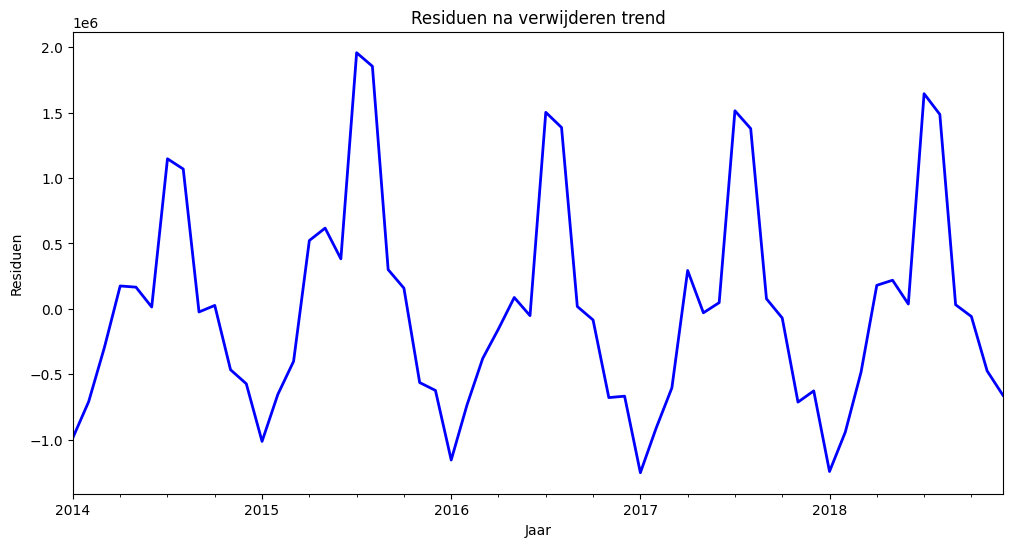

In [ ]:

# 8. Plot van residuen
dataset['residuen'].plot(color='blue', linewidth=2, figsize=(12,6))
plt.title('Residuen na verwijderen trend')
plt.xlabel('Jaar')
plt.ylabel('Residuen')
plt.show()

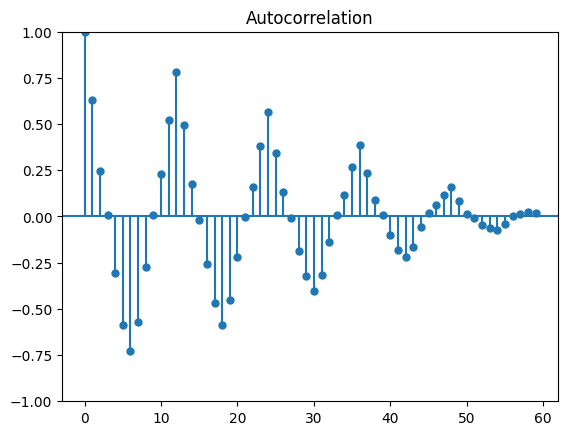

In [ ]:

# 9. Autocorrelatie plot
plot_acf(dataset['residuen'], lags=len(dataset)-1, alpha=None)
plt.show()


In [ ]:
# 10. Exponentiële demping: beste alpha zoeken
step = 1e-3
alphas = np.arange(start=0, stop=1+step, step=step)
df = pd.DataFrame()
mae = []

for alpha in alphas[1:]:
    exponential = dataset['residuen'].ewm(alpha=alpha, adjust=False).mean().shift(1)
    mae.append(abs(dataset['residuen'] - exponential).mean())

df['mae'] = mae
df.set_index(alphas[1:], inplace=True)
df.index.name = 'Alpha'

beste_alpha = df['mae'].idxmin()
print(f"Beste alpha: {beste_alpha}")

Beste alpha: 0.982


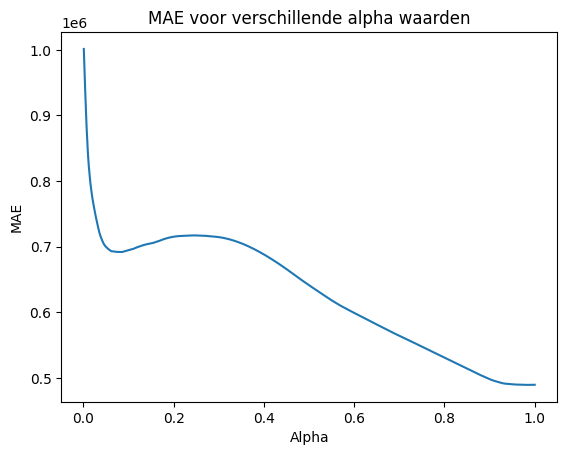

In [ ]:

# 11. Plot MAE vs alpha
plt.plot(df['mae'])
plt.title('MAE voor verschillende alpha waarden')
plt.xlabel('Alpha')
plt.ylabel('MAE')
plt.show()


In [ ]:
# 12. Exponentiële demping toepassen
dataset['exponentiele demping'] = dataset['residuen'].ewm(alpha=beste_alpha, adjust=False).mean().shift(1)


In [ ]:

# 13. Absolute fout van exponentiële demping
dataset['absolute fout exponentiele demping'] = abs(dataset['residuen'] - dataset['exponentiele demping'])

print("De mean absolute error is", round(dataset['absolute fout exponentiele demping'].mean(), 2))


De mean absolute error is 489214.85


In [ ]:
# 14. Voorspelling maken
dataset['voorspelling exponentiele demping'] = dataset['trendlijn'] + dataset['exponentiele demping']

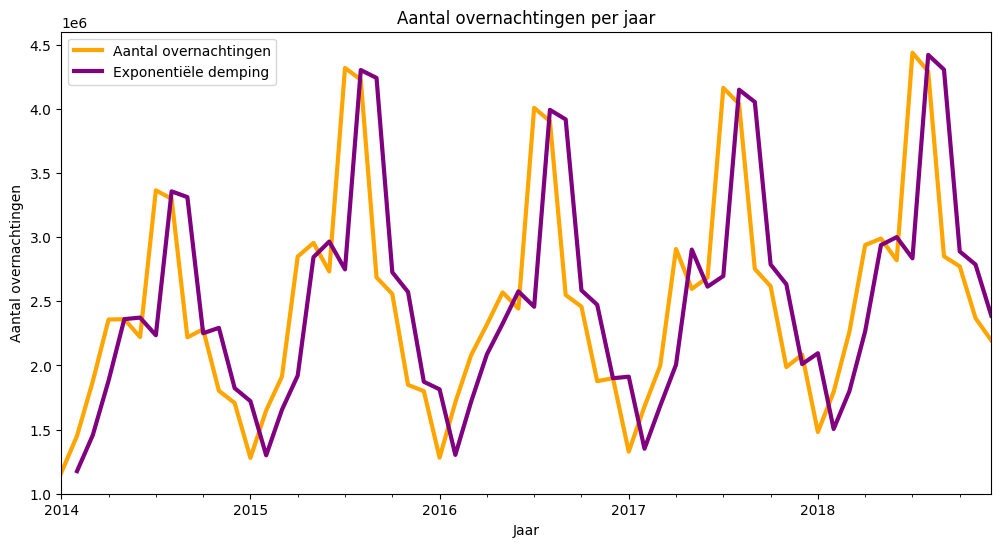

In [ ]:

# 15. Plot echte vs voorspelling
dataset.plot(y='Aantal overnachtingen', color='orange', linewidth=3, figsize=(12,6))
dataset['voorspelling exponentiele demping'].plot(color='purple', linewidth=3)
plt.legend(labels=['Aantal overnachtingen', 'Exponentiële demping'])
plt.title("Aantal overnachtingen per jaar")
plt.xlabel("Jaar")
plt.ylabel("Aantal overnachtingen")
plt.show()


In [ ]:

# 16. Voorspelling volgende sample
# Stel je wil voorspellen voor een toekomstige maand, bijvoorbeeld januari 2025
nieuwe_datum = pd.to_datetime('2025-01-01')
nieuwe_ordinal = nieuwe_datum.toordinal()

trend_overnachtingen = regressionline.predict(np.array([[nieuwe_ordinal]]))[0]
laatste_residuprog = dataset['exponentiele demping'].iloc[-1]
voorspelling_overnachting = trend_overnachtingen + laatste_residuprog

print(f"De voorspelling voor overnachtingen in januari 2025 is ongeveer {voorspelling_overnachting:.2f} aantal.")

De voorspelling voor overnachtingen in januari 2025 is ongeveer 3265003.25 aantal.


Deze code voorspelt het aantal overnachtingen voor een toekomstige maand, bijvoorbeeld januari 2025, op basis van een lineair model voor de trend en de laatste voorspelde residu van de exponentiële demping.

1. Bereken de trendwaarde voor de toekomstige datum
python
Copy
Edit
trend_overnachtingen = regressionline.predict(np.array([[nieuwe_ordinal]]))[0]
🔧 Uitleg:

nieuwe_ordinal is een toordinal() waarde voor 1 januari 2025.

regressionline.predict() gebruikt het lineaire regressiemodel om de trendlijnwaarde voor die datum te berekenen.

[0] is nodig omdat predict() een lijst van voorspellingen teruggeeft, en je wilt de eerste (en enige) waarde in die lijst.

📊 Resultaat:
Dit geeft je de verwachte basiswaarde voor overnachtingen op 1 januari 2025 zonder seizoensinvloeden.

2. Haal het laatste voorspelde residu op
python
Copy
Edit
laatste_residuprog = dataset['exponentiele demping'].iloc[-1]
🔧 Uitleg:

Je haalt de laatste waarde van de kolom 'exponentiele demping' uit je dataset.

iloc[-1] betekent “de laatste rij” van die kolom.

Dit is de laatste geschatte afwijking (residu) van de trendlijn, gebaseerd op exponentiële demping.

📊 Resultaat:
Dit getal weerspiegelt korte‑termijn fluctuaties die de trendlijn niet kan verklaren.

3. Combineer de trend en residu voor een complete voorspelling
python
Copy
Edit
voorspelling_overnachting = trend_overnachtingen + laatste_residuprog
🔧 Uitleg:

Optel de trendlijnwaarde en de laatste residuwaarde om de volledige voorspelling voor 1 januari 2025 te berekenen.

Dit combineert de lange‑termijn trend met korte‑termijn fluctuaties.

📝 Voorbeeld met data
Stel je dataset ziet er zo uit:

Datum	Aantal overnachtingen	exponentiele demping
2024-11-01	5000	40
2024-12-01	5200	35
2025-01-01	Voorspelling	??

Berekeningen:

Trendwaarde:

nieuwe_ordinal = 738361 (1 januari 2025)

trend_overnachtingen = 5500 (voorbeeld)

Laatste residu:

laatste_residuprog = 35

Voorspelling:

voorspelling_overnachting = 5500 + 35 = 5535

🔍 Waarom dit werkt:
Lineaire regressie (trendlijn) voorspelt lange‑termijn gedrag.

Exponentiële demping voorspelt korte‑termijn schommelingen.

Samen geven ze een completer beeld van de toekomstige waarde.

In [ ]:
df = dataset.groupby(['Maand']).mean(numeric_only=True)
print(df)


             Jaar  Aantal maanden na januari 2014  Aantal overnachtingen  \
Maand                                                                      
april      2016.0                            27.0              2674670.0   
augustus   2016.0                            31.0              3953957.2   
december   2016.0                            35.0              1937250.6   
februari   2016.0                            25.0              1657083.6   
januari    2016.0                            24.0              1305788.4   
juli       2016.0                            30.0              4060331.0   
juni       2016.0                            29.0              2581030.8   
maart      2016.0                            26.0              2026415.6   
mei        2016.0                            28.0              2694724.4   
november   2016.0                            34.0              1976721.6   
oktober    2016.0                            33.0              2537629.4   
september  2

In [ ]:
seizoensregressie = []
for i in range(len(dataset)):
    # Gebruik .iloc voor de rijnummering en .loc voor de kolomnaam
    trend = dataset.iloc[i]['trendlijn']
    maand = dataset.iloc[i]['Maand']
    residu = df.loc[maand, 'residuen']
    seizoensregressie.append(trend + residu)

dataset['seizoensregressie'] = seizoensregressie
dataset.head()


,Jaar,Maand,Aantal maanden na januari 2014,Aantal overnachtingen,trendlijn,residuen,exponentiele demping,absolute fout exponentiele demping,voorspelling exponentiele demping,seizoensregressie
Datum,,,,,,,,,,
2014-01-01,2014,januari,0,1162818,2.147781e+06,-984963.311341,NaN,NaN,NaN,1.017810e+06
2014-02-01,2014,februari,1,1450616,2.160004e+06,-709387.852882,-984963.311341,275575.458459,1.175041e+06,1.369105e+06
2014-03-01,2014,maart,2,1876276,2.171044e+06,-294767.567822,-714348.211134,419580.643312,1.456695e+06,1.738358e+06
2014-04-01,2014,april,3,2358104,2.183266e+06,174837.890637,-302320.019402,477157.910039,1.880946e+06,2.386612e+06
2014-05-01,2014,mei,4,2360854,2.195094e+06,165759.624629,166249.048256,489.423627,2.361343e+06,2.406667e+06


In [ ]:
dataset['absolute fout seizoensregressie'] = abs(dataset['Aantal overnachtingen'] - dataset['seizoensregressie'])
dataset.head()

,Jaar,Maand,Aantal maanden na januari 2014,Aantal overnachtingen,trendlijn,residuen,exponentiele demping,absolute fout exponentiele demping,voorspelling exponentiele demping,seizoensregressie,absolute fout seizoensregressie
Datum,,,,,,,,,,,
2014-01-01,2014,januari,0,1162818,2.147781e+06,-984963.311341,NaN,NaN,NaN,1.017810e+06,145008.449729
2014-02-01,2014,februari,1,1450616,2.160004e+06,-709387.852882,-984963.311341,275575.458459,1.175041e+06,1.369105e+06,81511.249729
2014-03-01,2014,maart,2,1876276,2.171044e+06,-294767.567822,-714348.211134,419580.643312,1.456695e+06,1.738358e+06,137918.104836
2014-04-01,2014,april,3,2358104,2.183266e+06,174837.890637,-302320.019402,477157.910039,1.880946e+06,2.386612e+06,28508.295164
2014-05-01,2014,mei,4,2360854,2.195094e+06,165759.624629,166249.048256,489.423627,2.361343e+06,2.406667e+06,45812.695164


In [ ]:
print(" De mean absolute error is:",round(dataset['absolute fout seizoensregressie'].mean(),2))

 De mean absolute error is: 118616.81


Text(0, 0.5, 'Jaar')

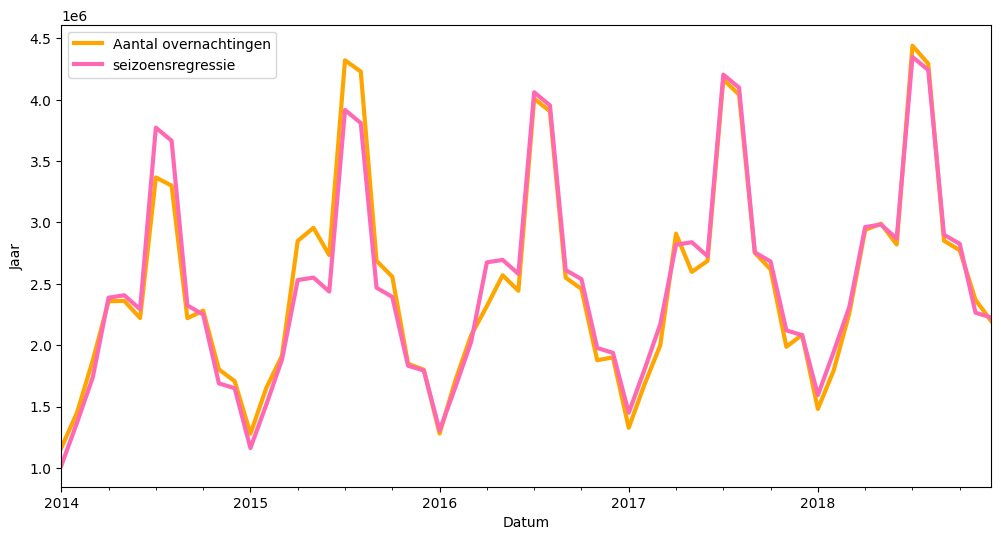

In [ ]:
dataset['Aantal overnachtingen'].plot(color='orange',linewidth=3,figsize=(12,6))
dataset['seizoensregressie'].plot(color='hotpink',linewidth=3)
plt.legend(labels = ['Aantal overnachtingen','seizoensregressie'])
plt.xlabel(dataset.index.name)
plt.ylabel(dataset.columns[0])

Je kunt voorspellingen maken met je getrainde lineaire regressiemodel in je Jupyter Notebook met de `regression_line_predict()` functie die ik voor je heb gemaakt. Hier is hoe je het in de praktijk kunt gebruiken:

### 1. Importeren van de functie

Zorg ervoor dat de `regression_line_predict()` functie in dezelfde notebook staat of dat je hem importeert als je hem in een aparte `.py` bestand hebt opgeslagen.

### 2. Data voorbereiden

Je moet je data splitsen in een trainingsset (`X_train`, `y_train`) en een optionele testset (`X_test`, `y_test`). Dit kan bijvoorbeeld zo:

```python
import pandas as pd
from sklearn.model_selection import train_test_split

# Voorbeelddata (gebruik je eigen data)
df = pd.read_csv('heart.csv')  # Verander dit naar je eigen dataset
X = df[['age']]  # Of een andere feature
y = df['chol']  # Doelvariabele

# Train-test splitten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

### 3. Model trainen en voorspellingen maken

Gebruik de functie zoals volgt:

```python
results = regression_line_predict(X_train, y_train, X_test, y_test, plot=True)

# Het getrainde model
model = results['model']

# Voorspelling maken voor nieuwe waarden
new_values = pd.DataFrame({'age': [50, 60, 70]})
predictions = model.predict(new_values)

print(predictions)
```

### 4. Resultaten bekijken

De functie geeft een dictionary terug met:

* `model`: Het getrainde lineaire regressiemodel.
* `train_predictions`: De voorspellingen voor de trainingsdata.
* `test_predictions`: De voorspellingen voor de testdata (indien aanwezig).

### 5. Nieuwe voorspellingen doen

Als je nu met nieuwe data wilt voorspellen, kun je simpelweg `model.predict()` gebruiken zoals hierboven.

---

Wil je dat ik deze functie nog uitbreid met bijvoorbeeld evaluatiemetrics zoals R² en RMSE om meteen te zien hoe goed je model presteert? Of misschien een versie voor meervoudige regressie? 😊


tip als ze vragen voor iets te voorsppeln doet dan ook als ze vragen om residu te plotten plot altijd residu en plot je acf ook en als data niet wekt vergete datums en stringd niet om tezetten